# Implementasi Gradient Descent

## Membuat Scatter Plot
Import data x.csv sebagai input variable dan y.csv sebagai output variable lalu lakukan scatterplot terhadap kedua variabel ini

C:\Users\ACER\AppData\Local\Temp\ipykernel_3444\372711905.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


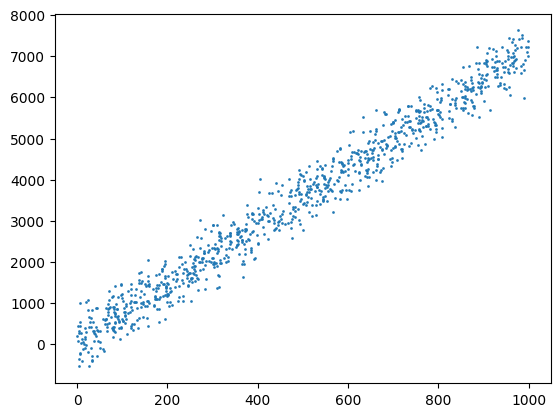

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

x = pd.read_csv('x.csv').columns.tolist()
x = np.array(list(map(float, x)))

y = pd.read_csv('y.csv').columns.tolist()
y = np.array(list(map(float, y)))

plt.scatter(x,y, s=1, alpha=0.9)
plt.show()

## Algoritma Gradient Descent

Rancang sebuah fungsi GradDesc(x, y, numIterations, alpha) 
Keterangan Input Fungsi: 
x adalah vektor variabel input, 
y adalah vektor variabel output 

Keterangan Output Fungsi: 
Fungsi mengoutputkan 2 buah vektor dengan panjang numIterations: 
Vektor theta0: kumpulan nilai theta0 hasil iterasi Gradient Descent 
Vektor theta1: kumpulan nilai theta1 hasil iterasi Gradient Descent 

Konvergensi didefinisikan secara sederhana, yaitu juga total iterasi sudah mencapai numIterations 
alpha adalah learning rate 



In [2]:
def linear_func(theta0, theta1, x):
    return theta0 + theta1*x

def GradDesc(x, y, numIterations, alpha):
    theta0 = 0
    theta1 = 0
    m = len(x)
    for i in range(numIterations):
        theta0 = theta0 - alpha*(1/m)*sum(linear_func(theta0, theta1, x) - y)
        theta1 = theta1 - alpha*(1/m)*sum((linear_func(theta0, theta1, x) - y)*x)
    return theta0, theta1

GradDesc(x, y, 100, 1e-7)

(0.01062196661779089, 6.86303065360273)

In [3]:
# ### Jawaban

# def GradDesc(x, y, numIterations, alpha):
#     theta0 = 0
#     theta1 = 0
#     theta0_list = []
#     theta1_list = []
#     m = len(x)
#     for i in range(numIterations):
#         theta0 = theta0 - alpha*(1/m)*sum(linear_func(theta0, theta1, x) - y)
#         theta0_list.append(theta0)
#         theta1 = theta1 - alpha*(1/m)*sum((linear_func(theta0, theta1, x) - y)*x)
#         theta1_list.append(theta0)
#     return theta0_list, theta1_list

# GradDesc(x, y, 100, 1e-7)

## Hasil Gradient Descent
Untuk permulaan, pilih nilai hyperparameter berikut: 
Nilai awal theta0 dan thetha1 adalah keduanya 0 

numIterations = 100 
alpha = 1e-7 

Terapkan fungsi Gradient Descent Anda untuk data latih yang sudah diberikan. 

Plot kembali data latih beserta grafik model linear dengan parameter hasil Gradient Descent pada iterasi terakhir. 

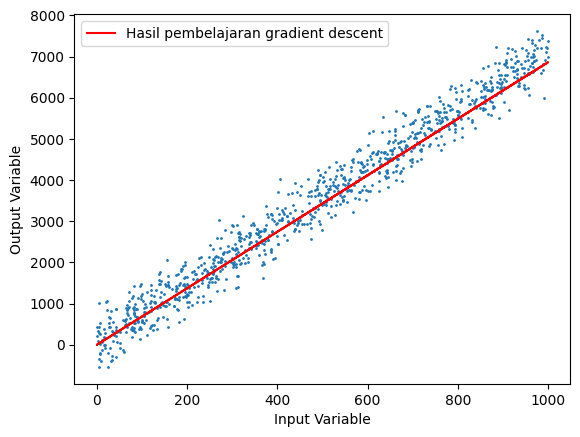

In [4]:
numIterations = 100
alpha = 1e-7

theta0, theta1 = GradDesc(x, y, numIterations, alpha)
t0, t1 = theta0, theta1

plt.scatter(x,y,s=1)
plt.plot(x, theta0+theta1*x, color='red', label="Hasil pembelajaran gradient descent")
plt.legend()
plt.xlabel('Input Variable')
plt.ylabel('Output Variable')
plt.show()

## Progress Pembelajaran Gradient Descent

Dari NumIterations kali iterasi, tampilkan progress pembelajaran algoritma untuk 10 milestones: yaitu mulai dari iterasi 0 dan bertambah 11.11% dari progress keseluruhan. 

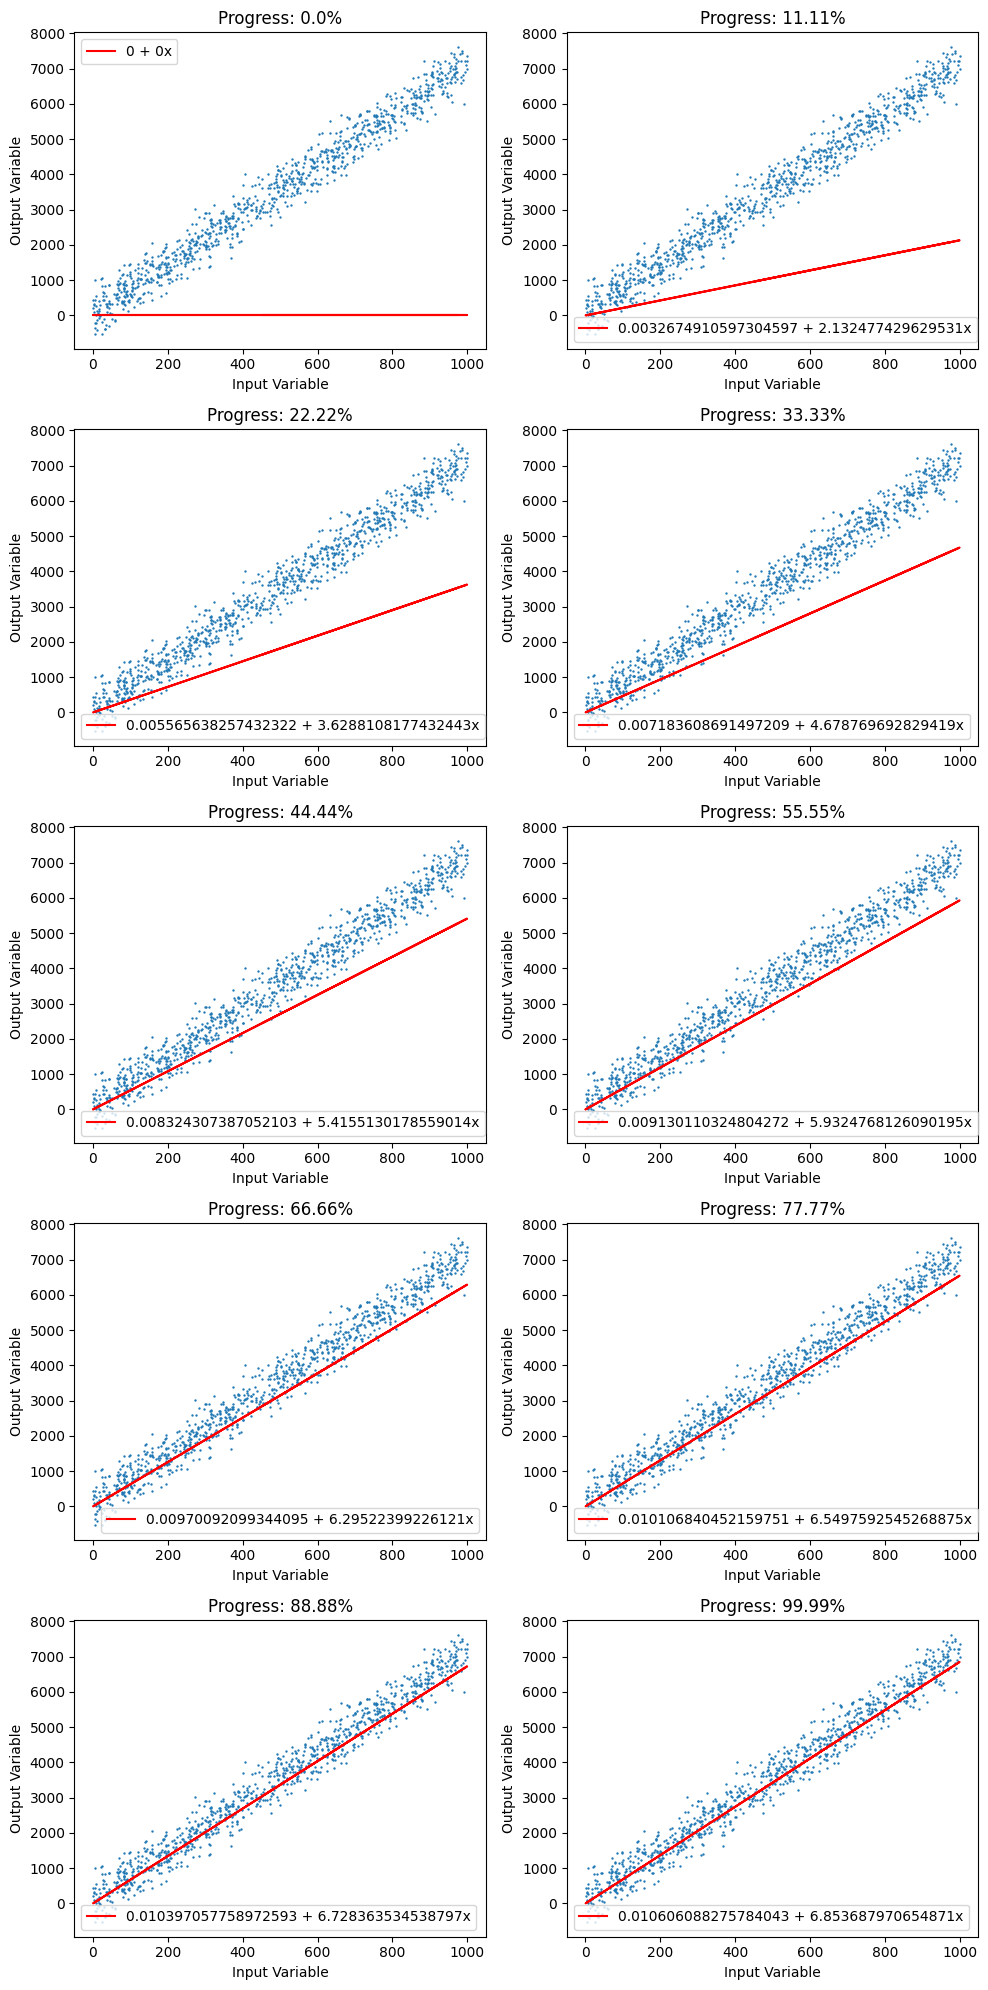

In [5]:
def PlotProgress(x, y, theta0, theta1):
    progress = 11.11
    counter = 1
    fig, axs = plt.subplots(5, 2, figsize=(10,20))

    for i in range(5):
        for j in range(2):
            step = 2*i + j
            axs[i, j].scatter(x, y, s = 0.5)
            axs[i, j].plot(x, theta0+theta1*x, color='red', label=f"{theta0} + {theta1}x")
            axs[i, j].set_title(f'Progress: {(counter-1)*progress}%')
            axs[i, j].legend()
            axs[i, j].set_xlabel('Input Variable')
            axs[i, j].set_ylabel('Output Variable')
            
            theta0, theta1 = GradDesc(x, y, counter*int(progress), 1e-7)
            counter += 1
            
    fig.tight_layout()

PlotProgress(x, y, 0, 0)

Tampilkan grafik learning curve, yaitu besarnya fungsi biaya dari progress model linear terhadap iterasi. 

In [6]:
# Untuk menampilkan kurva pembelajaran model regresi linear, 
# kita harus mempunyai value dari theta0 dan theta1 pada setiap kali iterasi.
# yang disimpan dalam sebuah list.
theta_list_0 = []
theta_list_1 = []
for i in range (numIterations):
    theta0, theta1=  GradDesc(x, y, i, alpha)
    theta_list_0.append(theta0)
    theta_list_1.append(theta1)

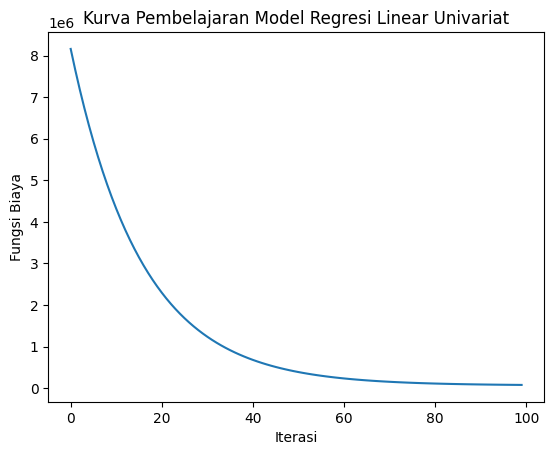

In [7]:
def cost_function(x, y, theta0, theta1):
    return (1/(2*(len(x))))*sum(((linear_func(theta0, theta1, x)) - y)**2)

y_learn_curve = [cost_function(x, y, theta_list_0[i], theta_list_1[i]) for i in range((numIterations))]
plt.plot(y_learn_curve)

plt.title("Kurva Pembelajaran Model Regresi Linear Univariat")
plt.xlabel("Iterasi")
plt.ylabel("Fungsi Biaya")
plt.show()

## Eksplorasi NumIterations

Dengan tetap memilih nilai alpha yang sama (alpha = 1e-7), kerjakan kembali algoritma Gradient Descent untuk: 
- NumIterations = 10 
- NumIterations = 1000 

Tampilkan plot data latih dan hasil model linear dari kedua nilai hyper parameter tersebut.

In [8]:
def eksplorasi(numIterations, alpha):
    theta0, theta1 = GradDesc(x, y, numIterations, alpha)
    t0, t1 = theta0, theta1

    plt.scatter(x,y,s=1)
    plt.plot(x, theta0+theta1*x, color='red')
    plt.legend()
    plt.xlabel('Input Variable')
    plt.ylabel('Output Variable')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


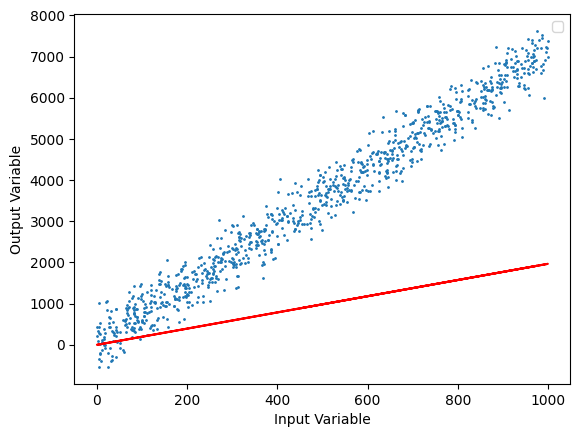

In [9]:
# Eksplorasi 1: NumIterations = 10 
numIterations = 10
alpha = 1e-7

### Jawaban
eksplorasi(numIterations, alpha)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


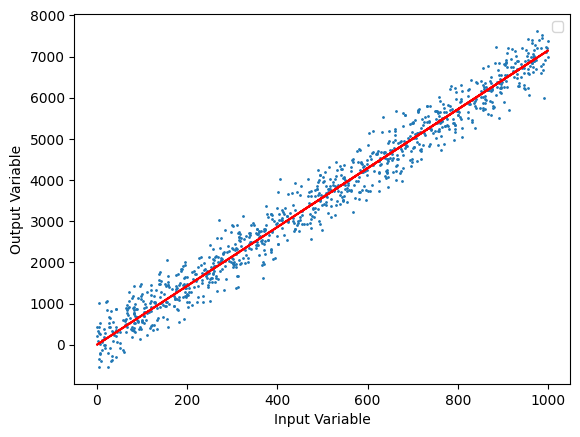

In [10]:
# Eksplorasi 2: NumIterations = 1000
numIterations = 1000
alpha = 1e-7

### Jawaban
eksplorasi(numIterations, alpha)


## Eksplorasi Alpha
Dengan tetap memilih nilai numIterations yang sama (numIterations = 100), kerjakan kembali algoritma Gradient Descent untuk: 
- alpha = 1e-8 
- alpha = 1e-5 

Tampilkan plot data latih dan hasil model linear dari kedua nilai hyper parameter tersebut.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


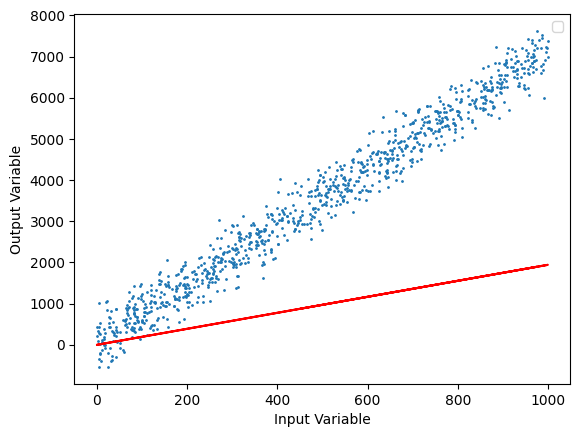

In [11]:
# Eksplorasi 3
numIterations = 100
alpha = 1e-8

### Jawaban
eksplorasi(numIterations, alpha)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


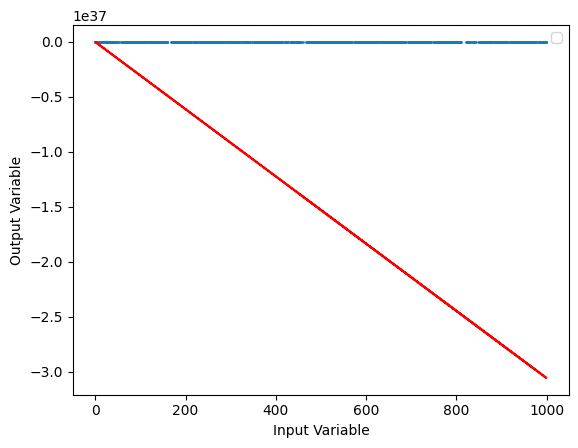

In [12]:
# Eksplorasi 4
numIterations = 100
alpha = 1e-5

### Jawaban
eksplorasi(numIterations, alpha)

## Gradient Descent Keseluruhan

Gunakan kode di bawah ini untuk membuat sebuah data latih acak dengan menggunakan tanggal lahir, bulan lahir, dan NIM anggota kelompok sebagai seed. Lakukan kembali proses Gradient Descent dengan memilih alpha dan numIterations yang tepat. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


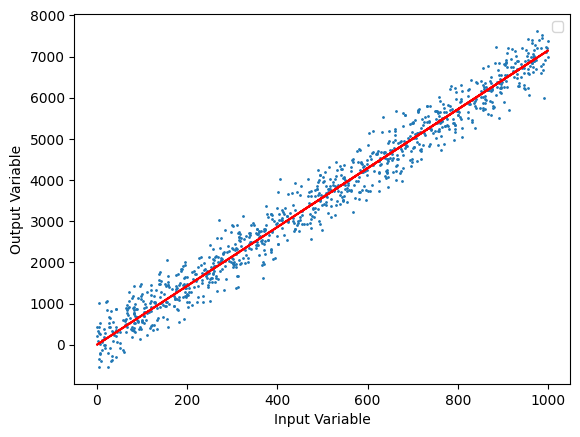

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


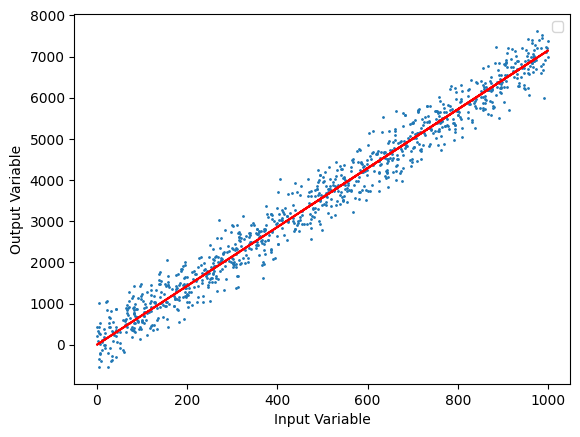

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


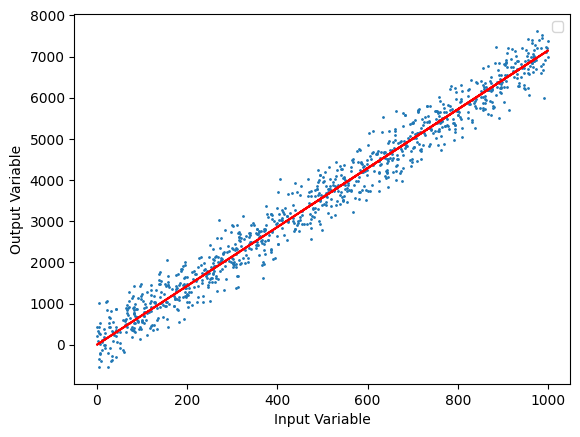

In [13]:
### Jawaban

rataan_tgl_lahir = 30
rataan_bln_lahir = 12
jumlah_3_dig_terakhir_nim = 224

def regress_kelompok(rataan_tgl_lahir, rataan_bln_lahir, jumlah_3_dig_terakhir_nim):
    m = 500 
    x = np.random.uniform(-jumlah_3_dig_terakhir_nim, jumlah_3_dig_terakhir_nim, m) 
    y = rataan_tgl_lahir + ((-1)**jumlah_3_dig_terakhir_nim) * rataan_bln_lahir * x 
    bound = (max(y)-min(y)) / 8 
    y += np.random.normal(0, bound, m) 

    numIterations = 1000
    alpha = 1e-7

    eksplorasi(numIterations, alpha)

regress_kelompok(30, 12, 224)
regress_kelompok(27, 7, 329)
regress_kelompok(20, 1, 304)